In this notebook I will study the equation that produced figure 9 of the paper. The matrix $U$ in the case is
$$\tag{1}
U = \begin{pmatrix}0.1 & -0.1 \\ -1 & 0 \end{pmatrix}.
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [36]:
def list_mul_2d(M, m):
    """ M is a list of lists. Multiply each one of them by m."""
    return [[m * x for x in L] for L in M]

def f(h, t, U, extra = 0):  
    v = np.matmul(U, h)
    v0 = v[0, 0]
    v1 = v[0, 1]
    [x, y] = h
    
    xdot = 0.5*(np.tanh(v0) - x)
    ydot = 0.5*(np.tanh(v1) - y)
    
    return [xdot, ydot]

def solve(U, x_init):    
    times = np.linspace(0, 500, 2000)  
    xs = odeint(f, x_init, times, args = (U, 0))
    
    return xs

def eu_dist(x1, x2):
    """Euclidean distance between points x1 and x2 in R^n."""   
    return np.linalg.norm(x1 - x2)

def get_distance(x_init, xs):
    return [eu_dist(x_init, x) for x in xs]
    
def draw_phase_portrait(U, size=1, title_str='Phase portrait'):
    # Create the grid in the domain [-1, 1] x [-1, 1].
    lo, hi = -0.5*size, 0.5*size
    X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = f([X[i, j], Y[i, j]], 0, U)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
    
    plt.title(title_str)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size):  
        times = np.linspace(0, 500, 2000)  
        xs = odeint(f, x_init, times, args = (U, 0))
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 4, color='blue') # end

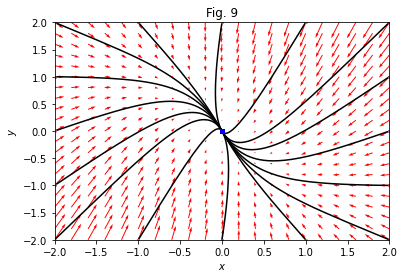

In [37]:
U = np.matrix([[0.1, -0.1],[-1, 0]])
draw_phase_portrait(U, 4, 'Fig. 9')

All trajectories converge to the origin. The origin is an attractor for this ODE.